<a href="https://colab.research.google.com/github/kartiknarayansahoo/deep_learning_specialization/blob/main/jovian-dl/Lesson%202%20-%20working%20with%20images%20and%20logistic%20regression/Lesson_2_jovian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [31]:
dataset = MNIST(root='data/', download=True)

In [32]:
len(dataset)

60000

In [33]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [34]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F8010750C50>, 5)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


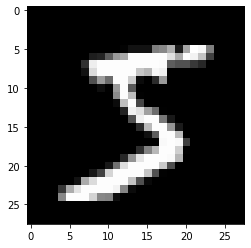

In [36]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

Label:  3


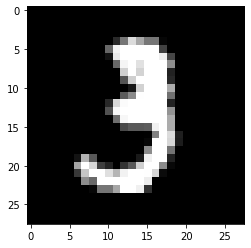

In [37]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [38]:
import torchvision.transforms as transforms

In [39]:
dataset = MNIST(root='data/',
               train=True,
               transform=transforms.ToTensor())

In [40]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [41]:
print(img_tensor)
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

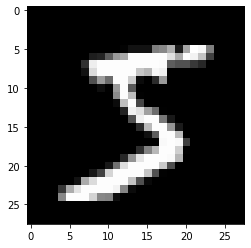

In [42]:
plt.imshow(img_tensor[0,:,:], cmap='gray')

# Training and validation datasets

In [43]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [44]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Creating the logtistic regression model

In [45]:
# we will have weights and biases

import torch.nn as nn

input_size = 28*28 # size of the input image (1*28*28)
num_classes = 10 # will predict the probability of image being (0-9)

# logistic regression model
model = nn.Linear(input_size, num_classes)

In [46]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0095, -0.0073,  0.0249,  ...,  0.0156, -0.0104, -0.0217],
        [-0.0351,  0.0010, -0.0022,  ...,  0.0113,  0.0071,  0.0206],
        [ 0.0253, -0.0150, -0.0226,  ...,  0.0311, -0.0154, -0.0171],
        ...,
        [-0.0084,  0.0297,  0.0035,  ...,  0.0073,  0.0184, -0.0166],
        [ 0.0197,  0.0203, -0.0031,  ...,  0.0007, -0.0010,  0.0144],
        [ 0.0322, -0.0024,  0.0313,  ..., -0.0150,  0.0077, -0.0064]],
       requires_grad=True)

In [47]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0278, -0.0269,  0.0168,  0.0135, -0.0228, -0.0053,  0.0097, -0.0237,
         0.0058,  0.0113], requires_grad=True)

In [48]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 2, 7, 7, 0, 8, 6, 8, 9, 3, 2, 9, 0, 0, 8, 0, 7, 9, 7, 2, 2, 1, 9, 3,
        4, 5, 0, 3, 6, 3, 2, 4, 9, 2, 4, 2, 7, 9, 9, 6, 7, 2, 0, 8, 6, 2, 4, 1,
        3, 9, 8, 6, 1, 7, 7, 7, 5, 4, 8, 8, 6, 6, 0, 4, 9, 5, 1, 8, 4, 7, 6, 1,
        7, 9, 4, 1, 1, 0, 0, 8, 2, 2, 1, 5, 9, 0, 5, 6, 2, 2, 1, 2, 0, 4, 7, 2,
        0, 2, 5, 4, 2, 6, 4, 0, 6, 9, 7, 8, 9, 9, 9, 5, 9, 1, 0, 5, 5, 1, 5, 8,
        7, 9, 6, 7, 5, 2, 5, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [49]:
class MnistModel (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 28*28)
        outputs = self.linear(xb)
        return outputs

model = MnistModel()

In [50]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [51]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0213, -0.0266,  0.0129,  ..., -0.0321, -0.0340, -0.0244],
         [ 0.0314, -0.0096,  0.0203,  ..., -0.0171, -0.0180, -0.0356],
         [ 0.0088, -0.0293, -0.0283,  ...,  0.0197,  0.0141,  0.0005],
         ...,
         [ 0.0132, -0.0101,  0.0101,  ...,  0.0323,  0.0302,  0.0233],
         [ 0.0076, -0.0224, -0.0339,  ...,  0.0237, -0.0307,  0.0196],
         [-0.0126, -0.0138,  0.0320,  ...,  0.0138,  0.0039,  0.0190]],
        requires_grad=True), Parameter containing:
 tensor([-0.0055,  0.0320, -0.0052,  0.0322, -0.0057,  0.0241, -0.0104,  0.0308,
          0.0020, -0.0154], requires_grad=True)]

In [53]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1928,  0.2691,  0.3677,  0.2893, -0.1455, -0.1089,  0.0597,  0.2775,
          0.0327,  0.2813],
        [-0.1224,  0.2135, -0.0788,  0.0767,  0.0191, -0.1505,  0.1696,  0.1098,
         -0.2022,  0.1865]])


## Applying softmax to get probabilities

In [54]:
import torch.nn.functional as F

In [55]:
outputs[:2]

tensor([[ 0.1928,  0.2691,  0.3677,  0.2893, -0.1455, -0.1089,  0.0597,  0.2775,
          0.0327,  0.2813],
        [-0.1224,  0.2135, -0.0788,  0.0767,  0.0191, -0.1505,  0.1696,  0.1098,
         -0.2022,  0.1865]], grad_fn=<SliceBackward0>)

In [58]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print('Sample probabilities: \n', probs[:2].data)

# Add up the probabilities of an output row
print('Sum: ', torch.sum(probs[1]).item())

Sample probabilities: 
 tensor([[0.1028, 0.1109, 0.1224, 0.1132, 0.0733, 0.0760, 0.0899, 0.1118, 0.0875,
         0.1123],
        [0.0857, 0.1199, 0.0895, 0.1045, 0.0987, 0.0833, 0.1147, 0.1080, 0.0791,
         0.1167]])
Sum:  1.0000001192092896


In [59]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 1, 7, 3, 9, 7, 9, 9, 9, 2, 7, 7, 2, 7, 7, 7, 2, 7, 2, 2, 1, 2, 7, 3,
        4, 7, 1, 2, 3, 3, 2, 2, 2, 1, 3, 7, 2, 2, 7, 2, 9, 9, 2, 9, 4, 3, 7, 2,
        7, 2, 9, 9, 1, 8, 7, 9, 2, 2, 1, 2, 7, 8, 2, 1, 1, 2, 9, 5, 2, 2, 7, 2,
        9, 9, 1, 1, 5, 7, 7, 7, 7, 2, 1, 2, 7, 1, 7, 2, 2, 9, 2, 7, 9, 9, 9, 3,
        9, 1, 2, 2, 9, 2, 2, 9, 7, 7, 9, 2, 7, 9, 7, 2, 9, 9, 2, 7, 2, 2, 4, 7,
        9, 1, 3, 1, 1, 2, 3, 2])
tensor([0.1224, 0.1199, 0.1397, 0.1187, 0.1307, 0.1371, 0.1224, 0.1338, 0.1315,
        0.1343, 0.1260, 0.1293, 0.1437, 0.1343, 0.1341, 0.1411, 0.1179, 0.1597,
        0.1328, 0.1310, 0.1378, 0.1305, 0.1242, 0.1480, 0.1205, 0.1218, 0.1225,
        0.1825, 0.1180, 0.1252, 0.1291, 0.1417, 0.1290, 0.1347, 0.1217, 0.1284,
        0.1376, 0.1291, 0.1388, 0.1224, 0.1498, 0.1369, 0.1129, 0.1406, 0.1194,
        0.1280, 0.1205, 0.1245, 0.1157, 0.1543, 0.1395, 0.1307, 0.1184, 0.1143,
        0.1309, 0.1282, 0.1202, 0.1225, 0.1216, 0.1275, 0.1313, 0.1320, 0.1260,
       

In [60]:
labels

tensor([5, 7, 9, 5, 3, 9, 8, 3, 2, 6, 3, 9, 0, 2, 9, 9, 9, 7, 3, 8, 3, 5, 3, 0,
        2, 9, 7, 2, 6, 6, 6, 7, 0, 3, 5, 3, 6, 2, 4, 1, 7, 5, 3, 3, 6, 0, 8, 1,
        1, 8, 0, 6, 1, 1, 9, 8, 1, 1, 7, 0, 6, 7, 2, 0, 9, 1, 4, 2, 6, 6, 5, 4,
        2, 1, 7, 2, 2, 8, 8, 6, 6, 1, 7, 1, 7, 9, 9, 1, 0, 9, 7, 4, 9, 2, 8, 6,
        6, 0, 1, 1, 7, 8, 6, 3, 6, 2, 4, 5, 4, 0, 9, 1, 1, 0, 8, 4, 6, 1, 2, 4,
        5, 0, 0, 7, 9, 5, 0, 3])

# Evaluation metric and loss function

In [61]:
outputs[:2]

tensor([[ 0.1928,  0.2691,  0.3677,  0.2893, -0.1455, -0.1089,  0.0597,  0.2775,
          0.0327,  0.2813],
        [-0.1224,  0.2135, -0.0788,  0.0767,  0.0191, -0.1505,  0.1696,  0.1098,
         -0.2022,  0.1865]], grad_fn=<SliceBackward0>)

In [62]:
torch.sum(preds == labels)

tensor(8)

In [69]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item())/len(preds)

In [70]:
accuracy(outputs, labels)

tensor(0.0625)


# Cross entropy as loss function


- the pytorch library has softmax implemented internally, so we can directly pass the outputs to the function instead of converting them to probabilities





In [71]:
outputs

tensor([[ 0.1928,  0.2691,  0.3677,  ...,  0.2775,  0.0327,  0.2813],
        [-0.1224,  0.2135, -0.0788,  ...,  0.1098, -0.2022,  0.1865],
        [-0.1563,  0.0442, -0.0030,  ...,  0.3279, -0.2464,  0.1827],
        ...,
        [ 0.1429,  0.1133,  0.4729,  ...,  0.0455,  0.0111,  0.0084],
        [ 0.1196,  0.2162,  0.1389,  ...,  0.1127,  0.1497,  0.0161],
        [ 0.0592,  0.0876,  0.5808,  ...,  0.0969,  0.0841,  0.4367]],
       grad_fn=<AddmmBackward0>)

In [72]:
loss_fn = F.cross_entropy

In [73]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2915, grad_fn=<NllLossBackward0>)


# Training the model

In [74]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [75]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [76]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [77]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.347888946533203, 'val_acc': 0.06734573096036911}

In [78]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9701, val_acc: 0.5868
Epoch [1], val_loss: 1.6994, val_acc: 0.7115
Epoch [2], val_loss: 1.4967, val_acc: 0.7531
Epoch [3], val_loss: 1.3432, val_acc: 0.7733
Epoch [4], val_loss: 1.2250, val_acc: 0.7882


In [79]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1323, val_acc: 0.7960
Epoch [1], val_loss: 1.0580, val_acc: 0.8042
Epoch [2], val_loss: 0.9972, val_acc: 0.8101
Epoch [3], val_loss: 0.9466, val_acc: 0.8151
Epoch [4], val_loss: 0.9039, val_acc: 0.8186


In [80]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8673, val_acc: 0.8227
Epoch [1], val_loss: 0.8357, val_acc: 0.8259
Epoch [2], val_loss: 0.8080, val_acc: 0.8280
Epoch [3], val_loss: 0.7835, val_acc: 0.8316
Epoch [4], val_loss: 0.7618, val_acc: 0.8335


In [81]:
history4 = fit(5, 0.0005, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7422, val_acc: 0.8359
Epoch [1], val_loss: 0.7246, val_acc: 0.8379
Epoch [2], val_loss: 0.7087, val_acc: 0.8394
Epoch [3], val_loss: 0.6941, val_acc: 0.8408
Epoch [4], val_loss: 0.6807, val_acc: 0.8437


In [83]:
history5 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6745, val_acc: 0.8445
Epoch [1], val_loss: 0.6684, val_acc: 0.8453
Epoch [2], val_loss: 0.6627, val_acc: 0.8457
Epoch [3], val_loss: 0.6571, val_acc: 0.8465
Epoch [4], val_loss: 0.6517, val_acc: 0.8466


In [84]:
history6 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6507, val_acc: 0.8468
Epoch [1], val_loss: 0.6496, val_acc: 0.8468
Epoch [2], val_loss: 0.6486, val_acc: 0.8471
Epoch [3], val_loss: 0.6476, val_acc: 0.8471
Epoch [4], val_loss: 0.6466, val_acc: 0.8473


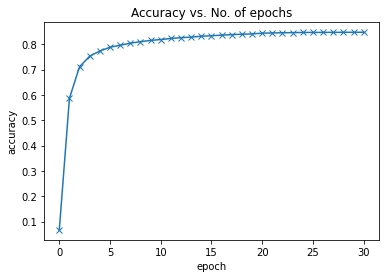

In [86]:
history = [result0] + history1 + history2 + history3 + history4 + history5 + history6
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing with individual images

In [87]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


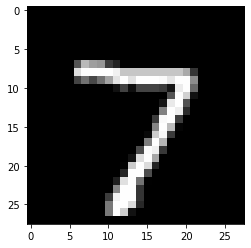

In [88]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [89]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


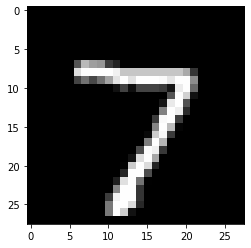

In [90]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


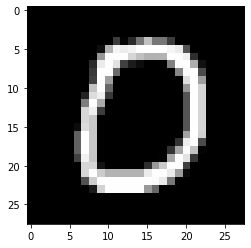

In [91]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


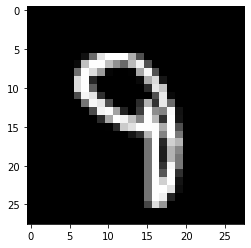

In [92]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


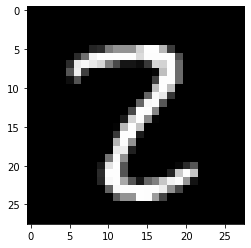

In [93]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [94]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6083782315254211, 'val_acc': 0.865039050579071}